In [17]:
from src.general.structures import *
from src.preprocessing.cleaning0 import *
from src.preprocessing.scaling import  *
import matplotlib.pyplot as plt

## EDA

In [9]:
df = pd.read_csv('../data/Train_timeseries.csv', index_col=0, parse_dates=True)

In [10]:
print(df)

                      Series1   Series2   Series3   Series4   Series5  \
Date                                                                    
2012-01-01 00:00:00  0.458882 -1.358177  1.893863  1.022005 -1.810638   
2012-01-01 00:01:00  0.398794 -1.356111  2.011162  1.104435 -1.807173   
2012-01-01 00:02:00  0.480416 -1.354050  2.116713  1.134004 -1.803721   
2012-01-01 00:03:00  0.319643 -1.351994  1.987292  0.996250 -1.800283   
2012-01-01 00:04:00  0.361104 -1.349943  2.059825  1.041442 -1.796859   
...                       ...       ...       ...       ...       ...   
2013-10-13 15:27:00 -0.763961 -1.670369  1.632822  0.327631 -1.465975   
2013-10-13 15:28:00 -0.929016 -1.799173  1.903091  0.607440 -1.464328   
2013-10-13 15:29:00 -1.058803 -1.798737  1.809294  0.673262 -1.462685   
2013-10-13 15:30:00 -0.996506 -1.798323  1.675207  0.526339 -1.461045   
2013-10-13 15:31:00 -0.921254 -1.797929  1.805300  0.599747 -1.459408   

                      Series6  
Date              

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 938372 entries, 2012-01-01 00:00:00 to 2013-10-13 15:31:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Series1  892283 non-null  float64
 1   Series2  892839 non-null  float64
 2   Series3  892434 non-null  float64
 3   Series4  892505 non-null  float64
 4   Series5  892842 non-null  float64
 5   Series6  892759 non-null  float64
dtypes: float64(6)
memory usage: 50.1 MB
None


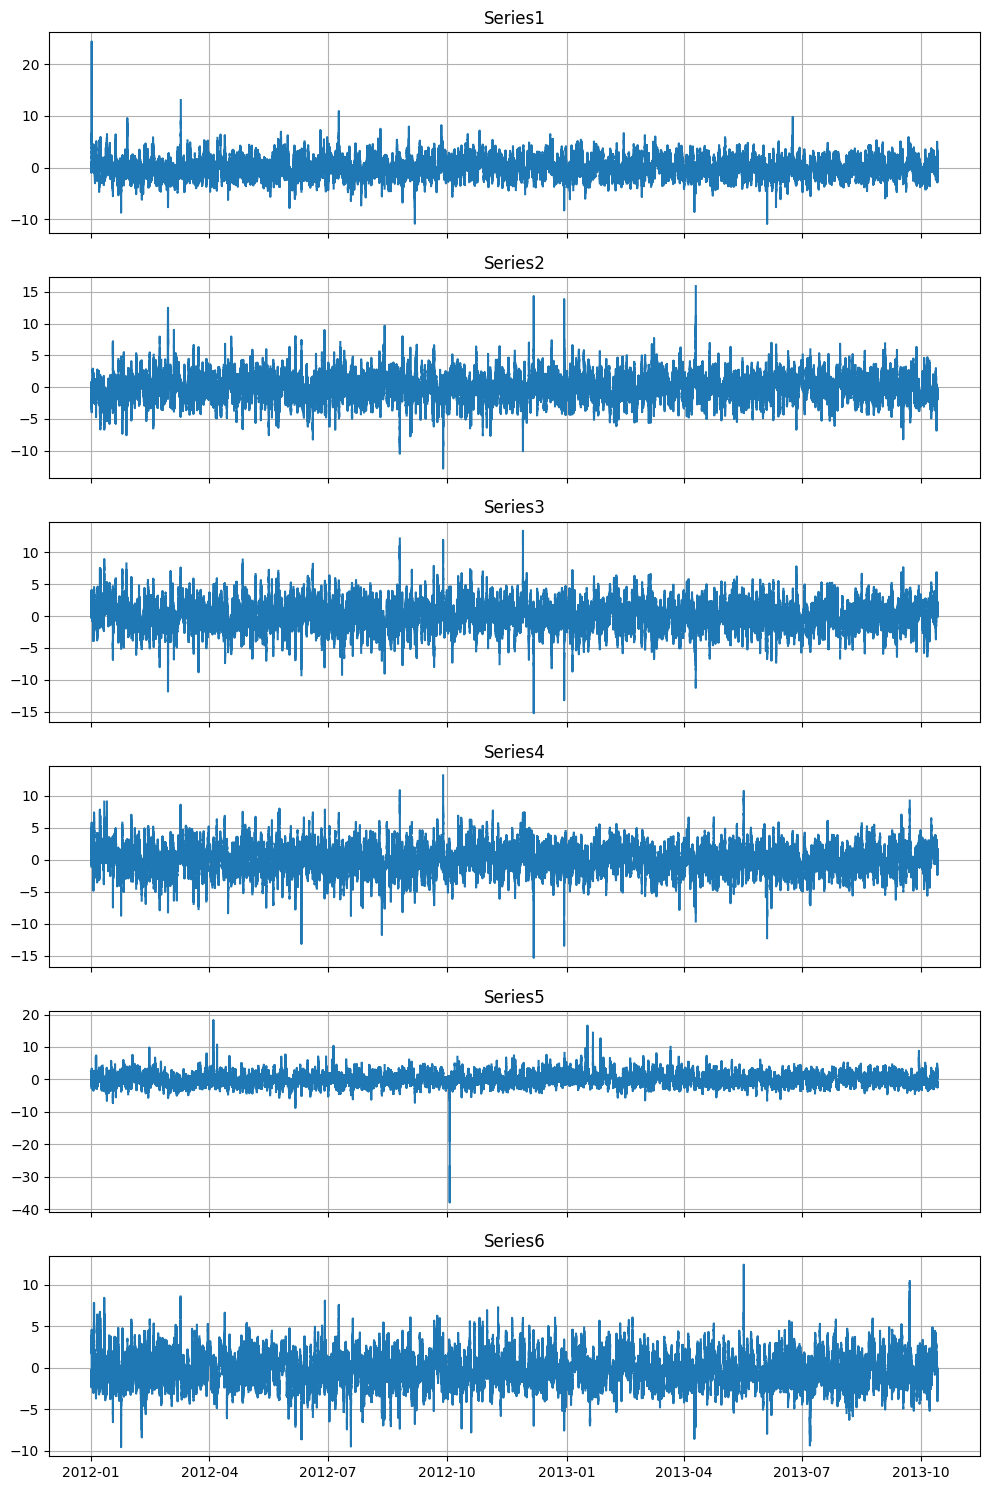

In [24]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)

# Проходимося по всіх колонках і осях
for i, column in enumerate(df1.columns):
    axes[i].plot(df1.index, df1[column])
    axes[i].set_title(column)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [36]:
cleaner = Pipeline([('iqr', IQRTransformer(strategy='nan'))])

In [40]:
ts = TSdata(data=df, targets = ['Series1', 'Series2', 'Series3', 'Series4', 'Series5'])
print(ts.data.isna().sum())

Series1    46089
Series2    45533
Series3    45938
Series4    45867
Series5    45530
Series6    45613
dtype: int64


In [42]:
ts1 = cleaner.fit_transform(ts)
print(ts1.data.isna().sum())

Calculated IQR boundaries: {'Series1': {'lower': np.float64(-4.356249633272942), 'upper': np.float64(4.175611517082414), 'Q1': np.float64(-1.1568017018896835), 'Q3': np.float64(0.9761635856991556), 'IQR': np.float64(2.132965287588839)}, 'Series2': {'lower': np.float64(-4.122220845017623), 'upper': np.float64(4.033133507771018), 'Q1': np.float64(-1.0639629627218827), 'Q3': np.float64(0.974875625475278), 'IQR': np.float64(2.0388385881971605)}, 'Series3': {'lower': np.float64(-3.926191530059506), 'upper': np.float64(4.065708772630649), 'Q1': np.float64(-0.9292289165506976), 'Q3': np.float64(1.0687461591218412), 'IQR': np.float64(1.9979750756725387)}, 'Series4': {'lower': np.float64(-4.049589766777941), 'upper': np.float64(4.128807176501788), 'Q1': np.float64(-0.9826909130480423), 'Q3': np.float64(1.06190832277189), 'IQR': np.float64(2.0445992358199323)}, 'Series5': {'lower': np.float64(-4.167137748758104), 'upper': np.float64(4.002699001846424), 'Q1': np.float64(-1.1034489672814058), 'Q3'

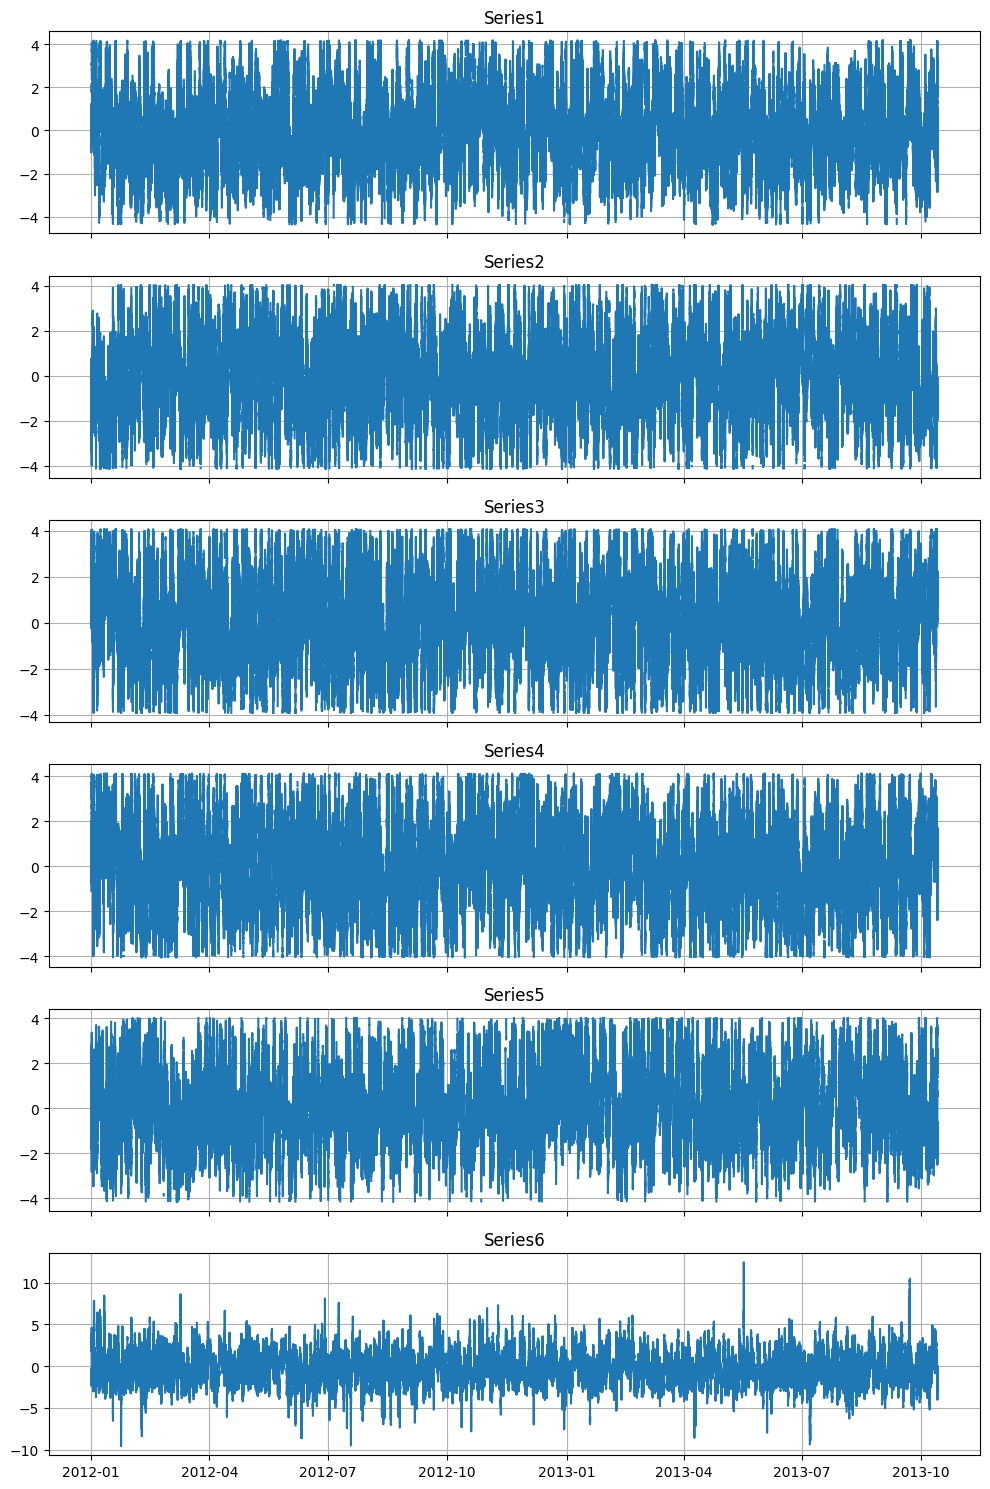

In [39]:
# Припустимо, твій датафрейм називається df
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
df1 = ts1.data
# Проходимося по всіх колонках і осях
for i, column in enumerate(df1.columns):
    axes[i].plot(df1.index, df1[column])
    axes[i].set_title(column)
    axes[i].grid(True)

plt.tight_layout()
plt.show()
